# Proyecto Final
## Estudio sobre la depresion en los estudiantes
El presente proyecto aborda un problema dual de clasificación binaria y análisis de regresión relacionado con la salud mental de estudiantes, específicamente enfocado en la depresión.<br>
El objetivo principal es predecir si un estudiante presenta depresión (variable objetivo Depression con valores 0 y 1, donde 1 indica presencia de depresión) basándonos en diversos factores demográficos, académicos, de estilo de vida y psicosociales.

Importamos el dataset

In [91]:
import pandas as pd


df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


### Analisis del Dataset
El dataset contiene 18 atributos que se pueden dividir de la siguiente manera:

#### Identificación:

id: Identificador único para cada estudiante (entero).

#### Variables Demográficas:

Gender: Género del estudiante (categórica: Male, Female).<br>
Age: Edad del estudiante en años (numérica, continua).<br>
City: Ciudad de residencia (categórica).<br>

#### Variables Académicas y Profesionales:

Profession: Ocupación del estudiante (categórica, principalmente "Student").<br>
Academic Pressure: Nivel de presión académica (numérica, escala del 0-5).<br>
Work Pressure: Nivel de presión laboral (numérica, escala del 0-5).<br>
CGPA: Promedio académico acumulado (numérica, continua).<br>
Study Satisfaction: Satisfacción con los estudios (numérica, escala del 1-5).<br>
Job Satisfaction: Satisfacción laboral (numérica, escala del 0-5).<br>
Degree: Grado académico que el estudiante está cursando (categórica).<br>
Work/Study Hours: Horas diarias dedicadas al trabajo/estudio (numérica, continua).<br>

#### Variables de Salud y Estilo de Vida:

Sleep Duration: Duración del sueño (categórica: "Less than 5 hours", "5-6 hours", "7-8 hours").<br>
Dietary Habits: Hábitos alimenticios (categórica: Healthy, Moderate, Unhealthy).<br>
Financial Stress: Nivel de estrés financiero (numérica, escala).<br>

#### Variables de Salud Mental:

Have you ever had suicidal thoughts?: Presencia de pensamientos suicidas (categórica binaria: Yes, No).<br>
Family History of Mental Illness: Antecedentes familiares de enfermedad mental (categórica binaria: Yes, No).

#### Variable Objetivo:

Depression: Presencia de depresión (categórica binaria codificada como 0 y 1, donde 1 indica presencia de depresión).


Valores nulos por columna:
id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

No hay valores nulos en el dataset de muestra.


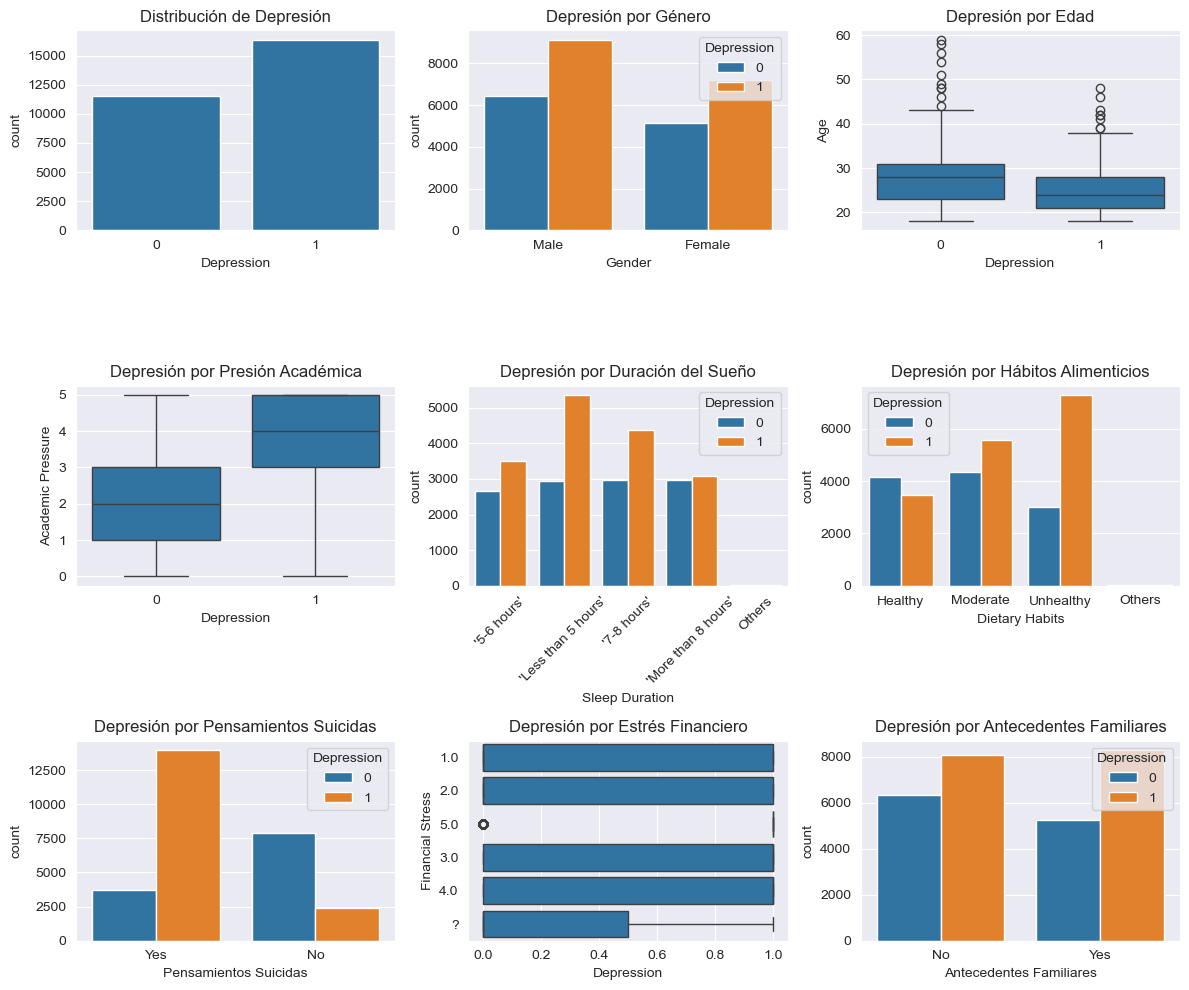

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- ANÁLISIS EXPLORATORIO DE DATOS (EDA) ----------
# ----- 1. ELIMINAR VALORES NULOS Y ATRIBUTOS NO NECESARIOS -----

# Verificamos valores nulos (para un dataset completo)
nulos_por_columna = df.isnull().sum()
print("\nValores nulos por columna:")
print(nulos_por_columna)

# Si hay valores nulos, decidimos cómo tratarlos
if nulos_por_columna.sum() > 0:
    print("\nTratamiento de valores nulos:")

    # Tratamiento de valores nulos para variables numéricas
    for columna in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[columna].isnull().sum() > 0:
            # Imputamos la mediana para variables numéricas
            mediana = df[columna].median()
            df[columna].fillna(mediana, inplace=True)
            print(f"- Columna '{columna}': {df[columna].isnull().sum()} valores nulos imputados con la mediana ({mediana})")

    # Tratamiento de valores nulos para variables categóricas
    for columna in df.select_dtypes(include=['object']).columns:
        if df[columna].isnull().sum() > 0:
            # Imputamos la moda para variables categóricas
            moda = df[columna].mode()[0]
            df[columna].fillna(moda, inplace=True)
            print(f"- Columna '{columna}': {df[columna].isnull().sum()} valores nulos imputados con la moda ({moda})")
else:
    print("\nNo hay valores nulos en el dataset de muestra.")

# Eliminamos atributos no necesarios
# 'id' no es relevante para la predicción, lo eliminamos
df = df.drop(['id'], axis=1)


# Configuración para las visualizaciones
plt.figure(figsize=(12, 10))

# 1. Distribución de la variable objetivo
plt.subplot(3, 3, 1)
sns.countplot(x='Depression', data=df)
plt.title('Distribución de Depresión')

# 2. Relación entre género y depresión
plt.subplot(3, 3, 2)
sns.countplot(x='Gender', hue='Depression', data=df)
plt.title('Depresión por Género')

# 3. Relación entre edad y depresión
plt.subplot(3, 3, 3)
sns.boxplot(x='Depression', y='Age', data=df)
plt.title('Depresión por Edad')

# 4. Relación entre presión académica y depresión
plt.subplot(3, 3, 4)
sns.boxplot(x='Depression', y='Academic Pressure', data=df)
plt.title('Depresión por Presión Académica')

# 5. Relación entre duración del sueño y depresión
plt.subplot(3, 3, 5)
sns.countplot(x='Sleep Duration', hue='Depression', data=df)
plt.title('Depresión por Duración del Sueño')
plt.xticks(rotation=45)

# 6. Relación entre hábitos alimenticios y depresión
plt.subplot(3, 3, 6)
sns.countplot(x='Dietary Habits', hue='Depression', data=df)
plt.title('Depresión por Hábitos Alimenticios')

# 7. Relación entre pensamientos suicidas y depresión
plt.subplot(3, 3, 7)
sns.countplot(x='Have you ever had suicidal thoughts ?', hue='Depression', data=df)
plt.title('Depresión por Pensamientos Suicidas')
plt.xlabel('Pensamientos Suicidas')

# 8. Relación entre estrés financiero y depresión
plt.subplot(3, 3, 8)
sns.boxplot(x='Depression', y='Financial Stress', data=df)
plt.title('Depresión por Estrés Financiero')

# 9. Relación entre antecedentes familiares y depresión
plt.subplot(3, 3, 9)
sns.countplot(x='Family History of Mental Illness', hue='Depression', data=df)
plt.title('Depresión por Antecedentes Familiares')
plt.xlabel('Antecedentes Familiares')

plt.tight_layout()
plt.savefig('EDA_Depression.png')
plt.show()

A simple vista podemos ver que la gente que tiene pensamientos suicidas son mas propensas a la depresion, al igual que el tener habitos alimenticios poco saludables, dormir menos de 5 horas y ser hombre.

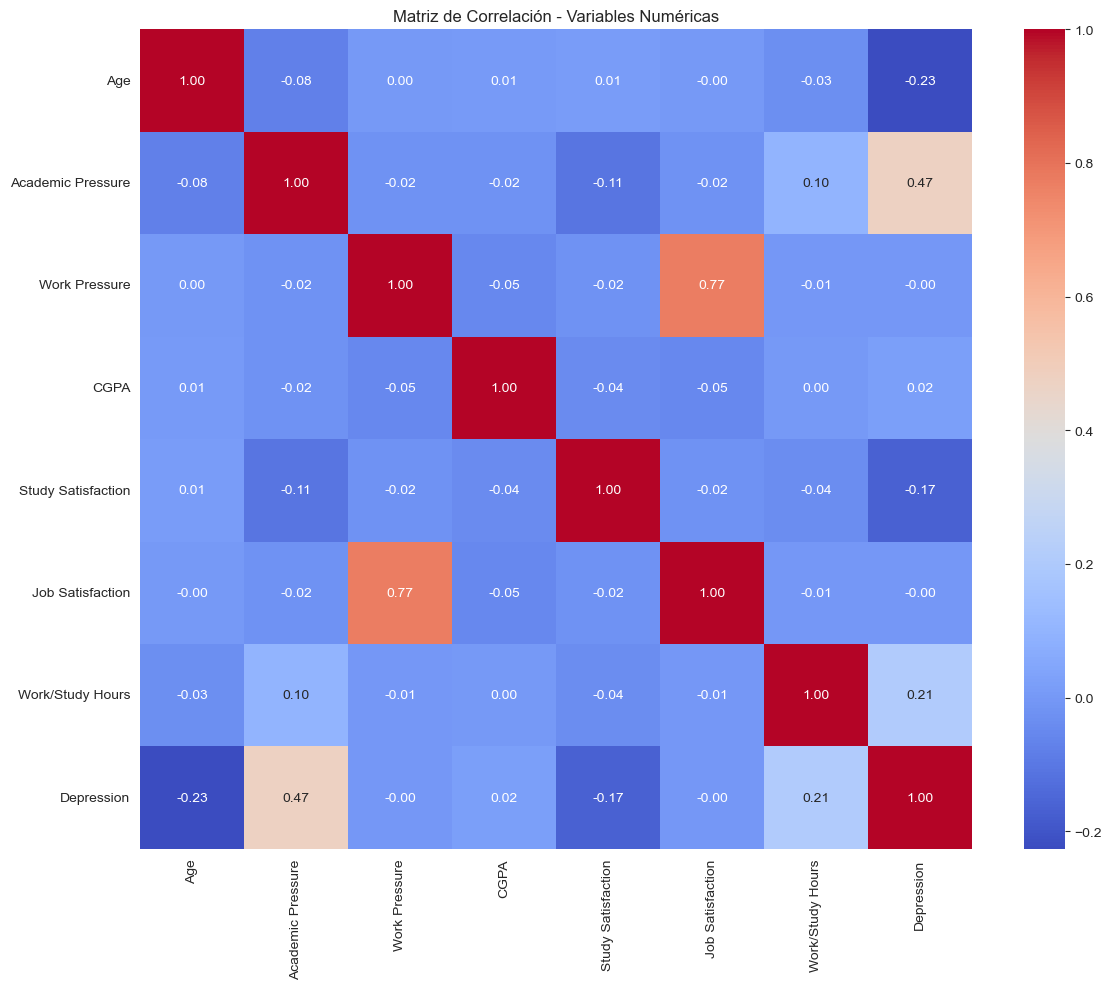

In [93]:
# Matriz de correlación para variables numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.savefig('Correlation_Matrix.png')
plt.show()


### Podemos identificar varias relaciones interesantes:

Presión de trabajo y satisfacción laboral: Existe una correlación positiva fuerte (0.77) entre la presión de trabajo y la satisfacción laboral, lo que sugiere que quienes experimentan mayor presión en el trabajo tienden a reportar mayor satisfacción laboral.

Presión académica y depresión: Hay una correlación positiva moderada (0.47) entre la presión académica y la depresión, indicando que mayores niveles de presión académica están asociados con mayores niveles de depresión.

Edad y depresión: Se observa una correlación negativa (-0.23) entre la edad y la depresión, sugiriendo que las personas de mayor edad tienden a reportar menos síntomas depresivos.

## Vamos a convertir los atributos categoricos en numericos y separacion

In [94]:
from sklearn.preprocessing import LabelEncoder

# Separamos las características y la variable objetivo
X = df.drop(['Depression'], axis=1)
y = df['Depression']
# Identificamos las columnas por tipo
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCaracterísticas categóricas:", categorical_features)
print("\nCaracterísticas numéricas:", numerical_features)

label_encoders = {}
for column in categorical_features:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
X = df.drop(['Depression'], axis=1)
y = df['Depression']
df.head()




Características categóricas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']

Características numéricas: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours']


,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.0,51,12,5.0,0.0,8.97,2.0,0.0,0,0,4,1,3.0,0,0,1
1,0,24.0,5,12,2.0,0.0,5.90,5.0,0.0,0,1,11,0,3.0,1,1,0
2,1,31.0,44,12,3.0,0.0,7.03,5.0,0.0,2,0,6,0,9.0,0,1,0
3,0,28.0,49,12,3.0,0.0,5.59,2.0,0.0,1,1,8,1,4.0,4,1,1
4,0,25.0,18,12,4.0,0.0,8.13,3.0,0.0,0,1,17,1,1.0,0,0,0


# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos estandarización a las variables numéricas
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score

# Dividimos los datos en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicamos estandarización a las variables numéricas
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])




## Vamos a aplicar primer lugar un modelo de regresion logistica, SVM, KNN y una red neuronal

  Tiempo de entrenamiento: 73.23840 segundos
  Tiempo de predicción: 8.11107 segundos
  Tiempo total: 81.34947 segundos


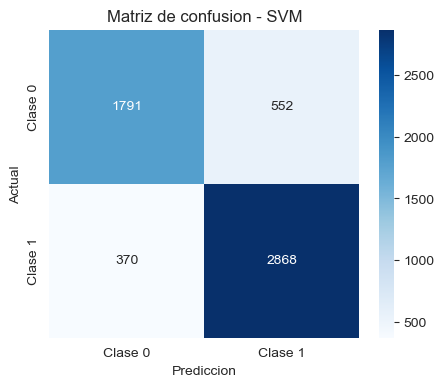

  Tiempo de entrenamiento: 0.00601 segundos
  Tiempo de predicción: 0.48830 segundos
  Tiempo total: 0.49431 segundos


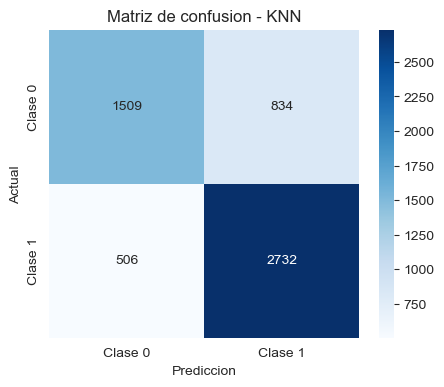

  Tiempo de entrenamiento: 0.07766 segundos
  Tiempo de predicción: 0.00201 segundos
  Tiempo total: 0.07966 segundos


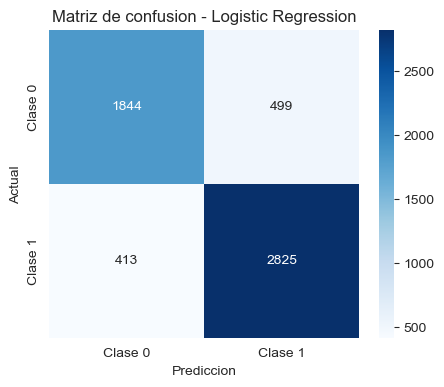

  Tiempo de entrenamiento: 5.88456 segundos
  Tiempo de predicción: 0.01084 segundos
  Tiempo total: 5.89540 segundos


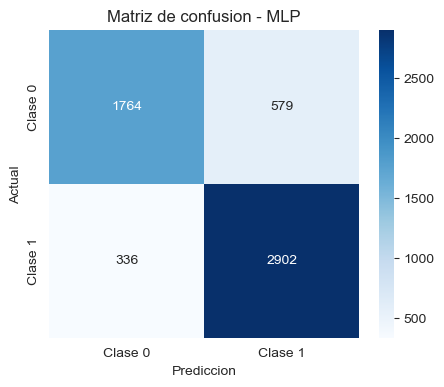

  Tiempo de entrenamiento: 2.17420 segundos
  Tiempo de predicción: 0.17189 segundos
  Tiempo total: 2.34609 segundos


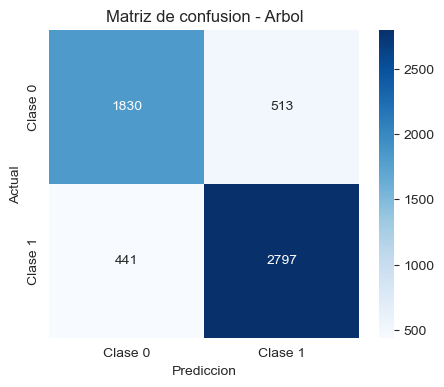

             SVM    KNN  Logistic Regression    MLP  Arbol
mse        16.52  24.01                16.34  16.39  17.09
r2         32.17   1.42                32.91  32.69  29.82
Accuracy   83.48  75.99                83.66  83.61  82.91
Precision  83.86  76.61                84.99  83.37  84.50
Recall     88.57  84.37                87.25  89.62  86.38
F1 Score   86.15  80.31                86.10  86.38  85.43
AUC-ROC    91.14  81.99                91.27  91.25  90.59


In [96]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lime import lime_tabular
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, f1_score, \
    roc_auc_score, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression




models = {

    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
     "Logistic Regression": LogisticRegression(),
    "MLP": MLPClassifier(hidden_layer_sizes=(10,10,10), activation='tanh', max_iter=500, random_state=42),
    "Arbol": RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}
training_times = {}
prediction_times = {}
total_times = {}
for name, model in models.items():
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    training_time = end_train_time - start_train_time
    training_times[name] = training_time
    start_pred_time = time.time()
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    end_pred_time = time.time()
    prediction_time = end_pred_time - start_pred_time
    prediction_times[name] = prediction_time
    total_time = training_time + prediction_time


    total_times[name] = total_time
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)


    results[name] = [mse, r2, accuracy, precision, recall, f1, auc_roc]
    # Imprimimos tiempos
    print(f"  Tiempo de entrenamiento: {training_time:.5f} segundos")
    print(f"  Tiempo de predicción: {prediction_time:.5f} segundos")
    print(f"  Tiempo total: {total_time:.5f} segundos")
    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)


    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
    plt.xlabel("Prediccion")
    plt.ylabel("Actual")
    plt.title(f"Matriz de confusion - {name}")
    plt.show()



df_results = pd.DataFrame(results, index=["mse","r2","Accuracy", "Precision", "Recall", "F1 Score", "AUC-ROC"])
df_percentage = df_results.round(4).mul(100)
print(df_percentage)



Si priorizas el recall (identificar correctamente los casos positivos), SVM es ligeramente mejor.<br>
Si priorizas la precisión (minimizar falsos positivos) o el AUC-ROC (rendimiento general en diferentes umbrales), la Regresión Logística es ligeramente superior.<br>
KNN no sería recomendable en este contexto, ya que su rendimiento es notablemente inferior en casi todos los aspectos, especialmente en precisión y AUC-ROC

## Comparamos resultados


Tiempos de ejecución (segundos):
                    SVM      KNN  Logistic Regression      MLP    Arbol
Entrenamiento  73.23840  0.00601              0.07766  5.88456  2.17420
Predicción      8.11107  0.48830              0.00201  0.01084  0.17189
Total          81.34947  0.49431              0.07966  5.89540  2.34609


<Figure size 1400x800 with 0 Axes>

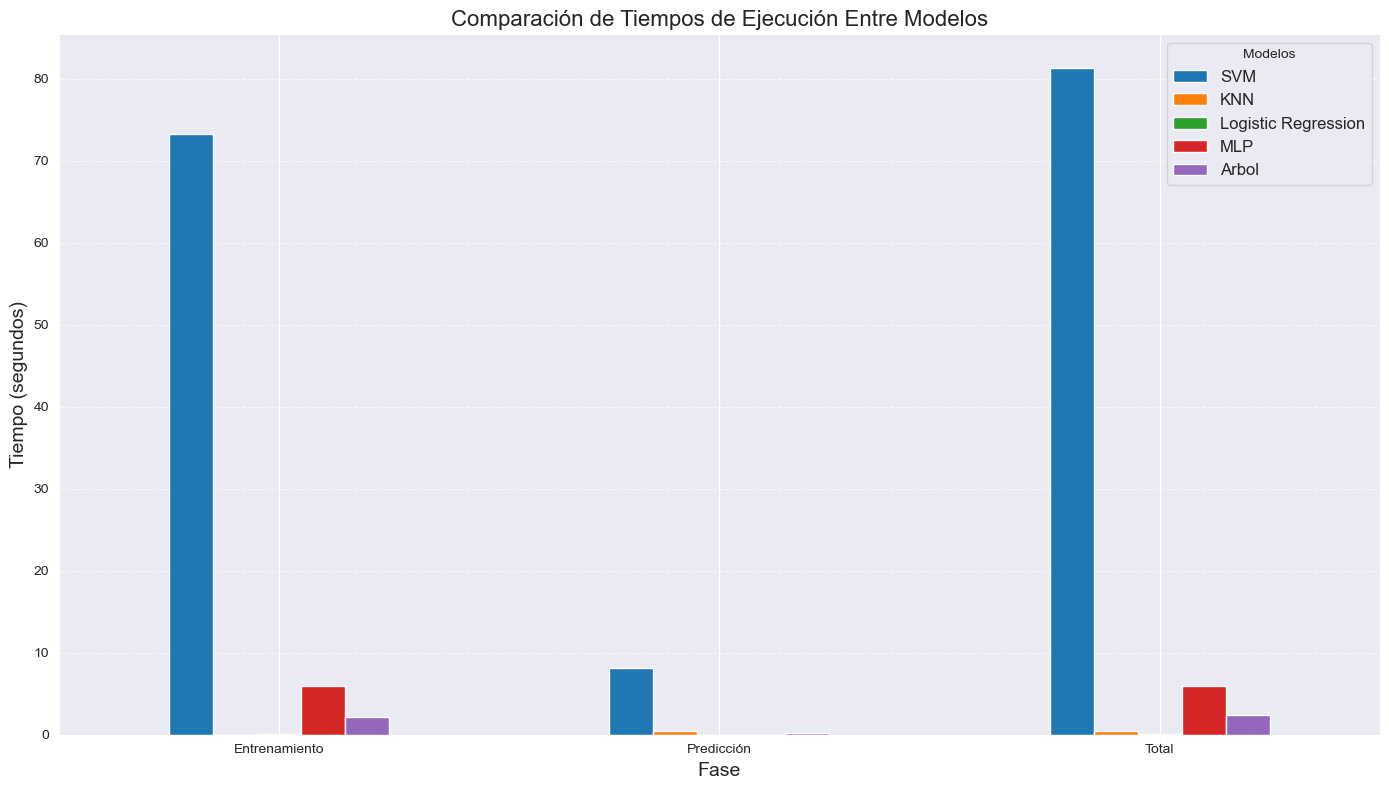

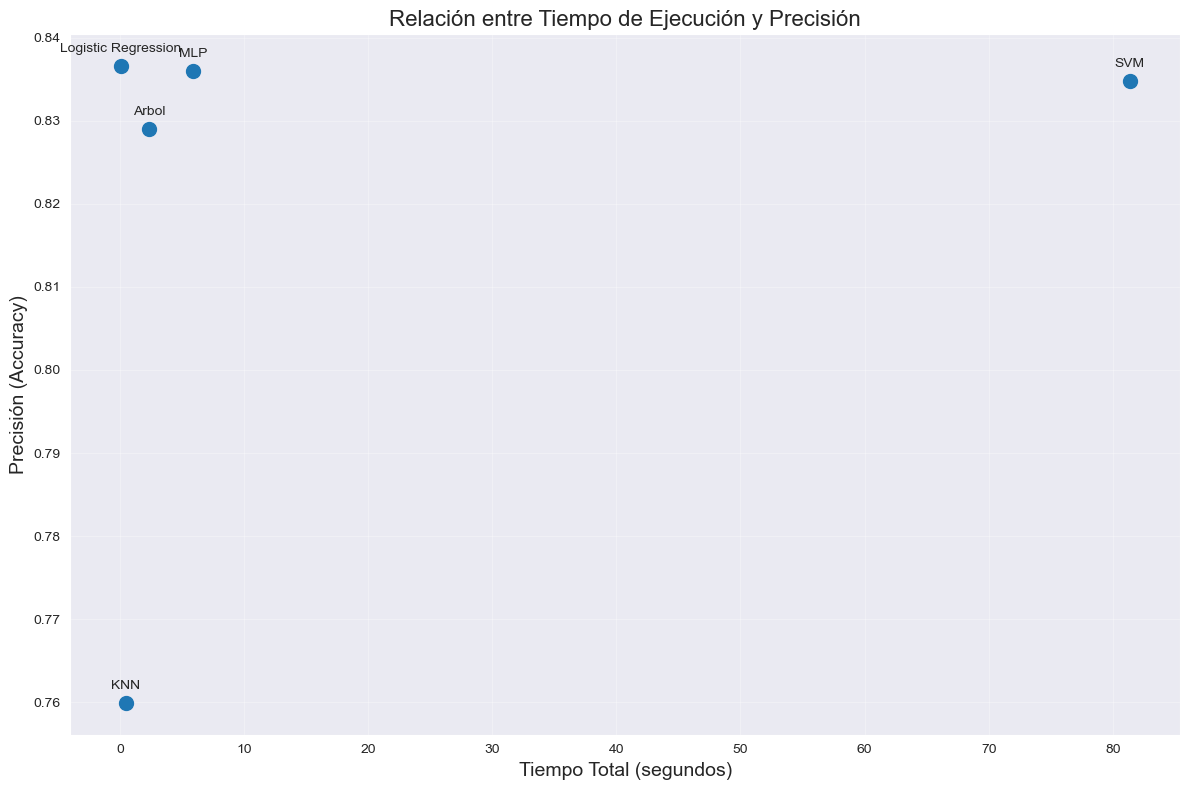

<Figure size 1000x1000 with 0 Axes>

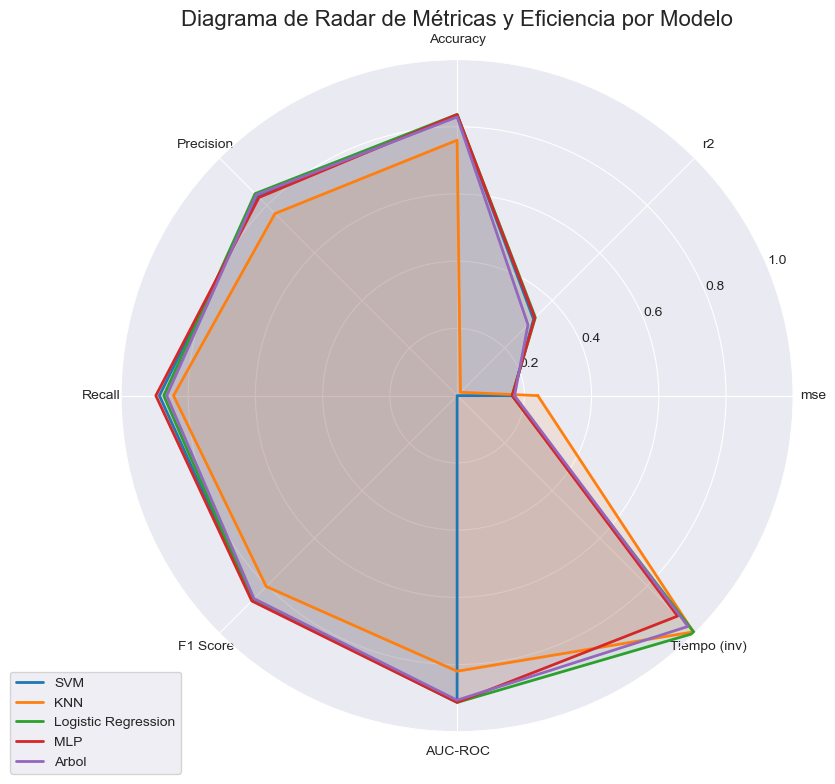

In [97]:
# Crear DataFrame de tiempos
df_times = pd.DataFrame({
    'Entrenamiento': training_times,
    'Predicción': prediction_times,
    'Total': total_times
}).T
print("\nTiempos de ejecución (segundos):")
print(df_times.round(5))
# Visualizamos la comparación de tiempos
plt.figure(figsize=(14, 8))
df_times.plot(kind='bar', figsize=(14, 8))
plt.title('Comparación de Tiempos de Ejecución Entre Modelos', fontsize=16)
plt.xlabel('Fase', fontsize=14)
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, title="Modelos")
plt.tight_layout()
plt.savefig('comparacion_tiempos_modelos.png')
plt.show()

# Gráfico comparativo entre tiempo total y precisión
plt.figure(figsize=(12, 8))
plt.scatter(total_times.values(), [results[model][2] for model in models.keys()], s=100)

# Añadir etiquetas a cada punto
for i, model in enumerate(models.keys()):
    plt.annotate(model,
                 (total_times[model], results[model][2]),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.title('Relación entre Tiempo de Ejecución y Precisión', fontsize=16)
plt.xlabel('Tiempo Total (segundos)', fontsize=14)
plt.ylabel('Precisión (Accuracy)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('tiempo_vs_precision.png')
plt.show()

# Gráfico de radar combinando métricas y tiempo normalizado
metrics = df_results.index.tolist() + ['Tiempo (inv)']
model_names = df_results.columns

# Normalizar tiempos y convertirlos a un indicador inverso (menos tiempo = mejor)
max_time = max(total_times.values())
normalized_times = {model: 1 - (time/max_time) for model, time in total_times.items()}

plt.figure(figsize=(10, 10))
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Cerrar el polígono

# Preparar el gráfico
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw=dict(polar=True))

for model in model_names:
    values = df_results[model].tolist() + [normalized_times[model]]
    values += values[:1]  # Cerrar el polígono
    ax.plot(angles, values, linewidth=2, label=model)
    ax.fill(angles, values, alpha=0.1)

# Configurar etiquetas
ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0, 1)
plt.title('Diagrama de Radar de Métricas y Eficiencia por Modelo', fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.savefig('diagrama_radar_metricas_tiempo.png')
plt.show()